<a href="https://colab.research.google.com/github/krishnamhn009/datascience/blob/master/Parkinson_s_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![parkinsons.png](attachment:parkinsons.png)

# Import libraries

In [162]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import metrics

# Import input file

In [163]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Examining the dataset

In [164]:
print(f"The shape of the DatFrame is: {data.shape}, which means there are {data.shape[0]} rows and {data.shape[1]} columns.")

The shape of the DatFrame is: (195, 24), which means there are 195 rows and 24 columns.


In [165]:
pd.set_option('max_columns', 25)
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


  # Data description
* name - ASCII subject name and recording number
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
*  MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
*  MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
*  NHR,HNR - Two measures of ratio of noise to tonal components in the voice
*  status - Health status of the subject (one) - Parkinson's, (zero) - healthy
*  RPDE,D2 - Two nonlinear dynamical complexity measures
*  DFA - Signal fractal scaling exponent
*  spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation



In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [167]:
# Check if any of the columns have null values
print(data.isnull().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


We can clearly see from the result that we have no missing values in our dataset

# Descriptive Statistics


In [126]:
# descriptive statistics for numerical columns
data.describe().style.background_gradient(cmap = 'Blues_r')

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


It is clearly shown that most of the featurs have no outlies in the dataset, but we are suspencting 3 feature ('MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)'). So let's plot these 3 features and check for outliers in it

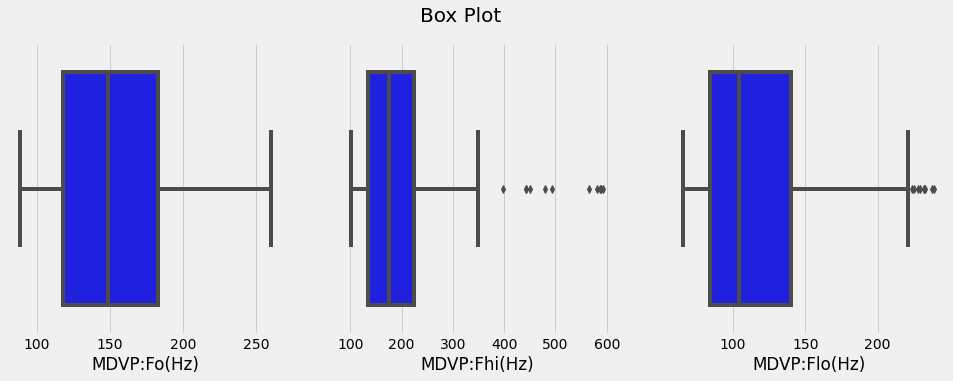

In [127]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')


plt.subplot(1, 3, 1)
sns.boxplot(data['MDVP:Fo(Hz)'], color = 'blue')


plt.subplot(1, 3, 2)
sns.boxplot(data['MDVP:Fhi(Hz)'], color = 'blue')

plt.subplot(1, 3, 3)
sns.boxplot(data['MDVP:Flo(Hz)'], color = 'blue')

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

These 3 box plots showing that the feature "MDVP:Fo(Hz)" have no outliers

In the feature "MDVP:Flo(Hz)", we can see some points after the Max Value, which can be termed to be as Outliers. We do not need to remove these values, as the values are not very far and Huge.

In the feature "MDVP:Fhi(Hz)", we can see some noticable outliers. So let's remove those from the dataset

In [128]:
data = data[data['MDVP:Fhi(Hz)'] < 336]

In [129]:
print(f"The shape of the DatFrame is: {data.shape}, which means there are {data.shape[0]} rows and {data.shape[1]} columns.")

The shape of the DatFrame is: (183, 24), which means there are 183 rows and 24 columns.


### 0.06% data removed , which is less as compared to total data.

In [130]:
# descriptive statistics for catagorical column
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,154.408705,177.414634,118.056519,0.006074,0.000043,0.003236,0.003379,0.009710,0.029764,0.281082,0.015721,0.017994,0.024138,0.047164,0.023295,21.870344,0.754098,0.498713,0.720604,-5.702240,0.224223,2.373700,0.205489
std,42.032231,46.497012,43.777916,0.004603,0.000033,0.002801,0.002634,0.008402,0.018392,0.189398,0.009800,0.011891,0.016889,0.029400,0.037347,4.409621,0.431802,0.106316,0.054879,1.095932,0.083396,0.384144,0.090129
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,133.791500,86.206000,0.003405,0.000020,0.001655,0.001840,0.004970,0.016505,0.147000,0.008430,0.009655,0.013080,0.025300,0.005795,19.198000,1.000000,0.417989,0.678402,-6.476762,0.173420,2.085280,0.135816
50%,148.790000,164.989000,105.007000,0.004900,0.000030,0.002500,0.002670,0.007490,0.023620,0.221000,0.012890,0.014050,0.018520,0.038670,0.011410,21.875000,1.000000,0.497480,0.724045,-5.724056,0.216204,2.359973,0.193918
75%,183.787500,215.797500,142.148500,0.007300,0.000060,0.003835,0.003970,0.011505,0.038310,0.355500,0.020435,0.022735,0.029600,0.061310,0.025070,25.127000,1.000000,0.592669,0.762617,-5.123622,0.274273,2.583133,0.251072
max,260.105000,272.210000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


It is clearly shown that the "name" column have 100% uniquness. So it'll not going to contribute much for building the model.

In [131]:
data.drop('name', axis=1, inplace = True)

# Target feature analysis


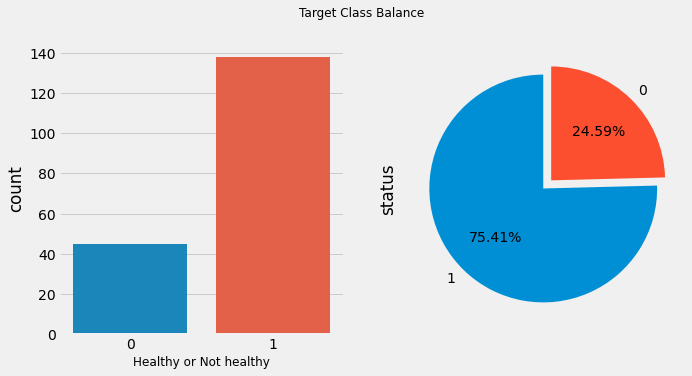

In [132]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(data['status'])

plt.xlabel('Healthy or Not healthy', fontsize = 12)

plt.subplot(1, 2, 2)
data['status'].value_counts().plot(kind = 'pie', explode = [0, 0.1], 
                                   autopct = '%.2f%%', startangle = 90, labels = ['1','0'])

plt.suptitle('Target Class Balance', fontsize = 12)
plt.show()


We can easily see a high imbalance in target feature "status" and the classes in target feature have to be balanced.  We'll have very low results, which'll totally biassed in relation to class with a higher distribution, when we use machine learning models with imbalanced data.

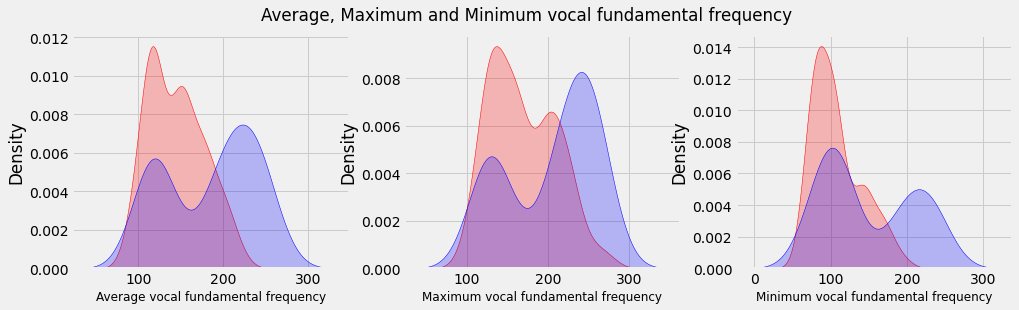

In [133]:
plt.rcParams['figure.figsize'] = (15, 4)
plt.subplot(131)
sns.kdeplot(data.loc[(data['status']==1), 'MDVP:Fo(Hz)'], color='r', shade=True, Label='1')
sns.kdeplot(data.loc[(data['status']==0), 'MDVP:Fo(Hz)'], color='b', shade=True, Label='0')
plt.xlabel('Average vocal fundamental frequency', fontsize=12)

plt.subplot(132)
sns.kdeplot(data.loc[(data['status']==1), 'MDVP:Fhi(Hz)'], color='r', shade=True, Label='1')
sns.kdeplot(data.loc[(data['status']==0), 'MDVP:Fhi(Hz)'], color='b', shade=True, Label='0')
plt.xlabel('Maximum vocal fundamental frequency', fontsize=12)

plt.subplot(133)
sns.kdeplot(data.loc[(data['status']==1), 'MDVP:Flo(Hz)'], color='r', shade=True, Label='1')
sns.kdeplot(data.loc[(data['status']==0), 'MDVP:Flo(Hz)'], color='b', shade=True, Label='0')
plt.xlabel('Minimum vocal fundamental frequency', fontsize=12)

plt.suptitle('Average, Maximum and Minimum vocal fundamental frequency')
plt.show()


from this graphs we can see that vocal frequency for healthy people is genaraly between 100 to 300. But for the Parkinson people most of the records are between 100 to 200 only

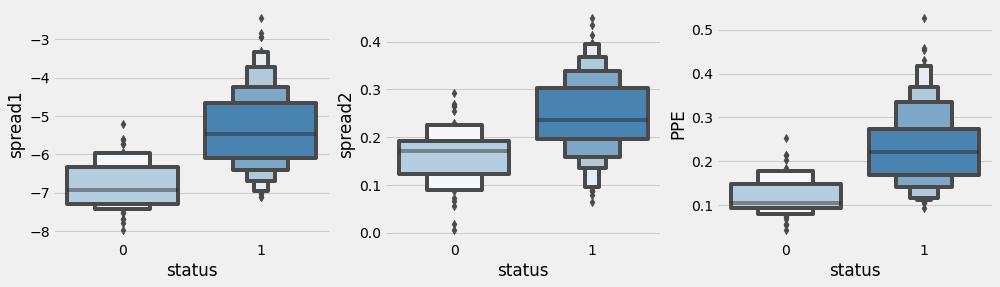

In [134]:
plt.rcParams['figure.figsize'] = (15,4)
plt.subplot(131)
sns.boxenplot(data['status'], data['spread1'], palette = 'Blues')

plt.subplot(132)
sns.boxenplot(data['status'], data['spread2'], palette = 'Blues')

plt.subplot(133)
sns.boxenplot(data['status'], data['PPE'], palette = 'Blues')

plt.show()

It clearly shown that nonlinear measures of fundamental frequency variation of healthy people is always lower than the parkinson affected people

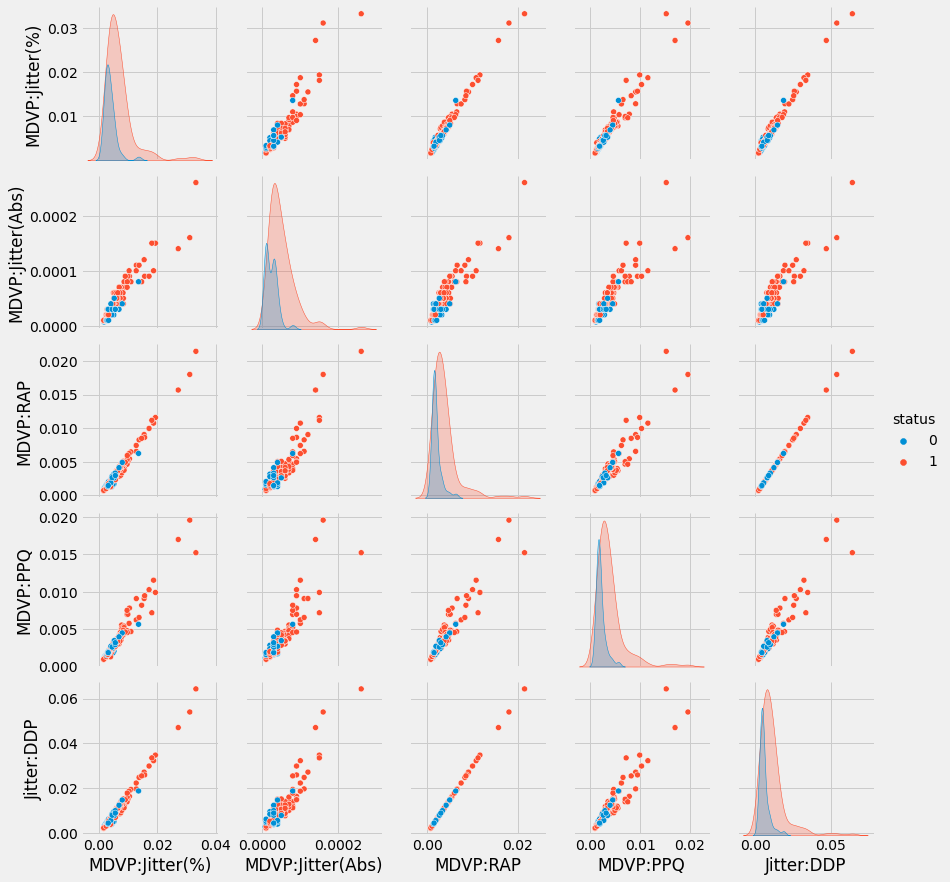

In [135]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(data,hue = 'status', vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'] )
plt.show()

From the above pair plot we can understand that all these fundamental frequencies are highly correlated with eachother.

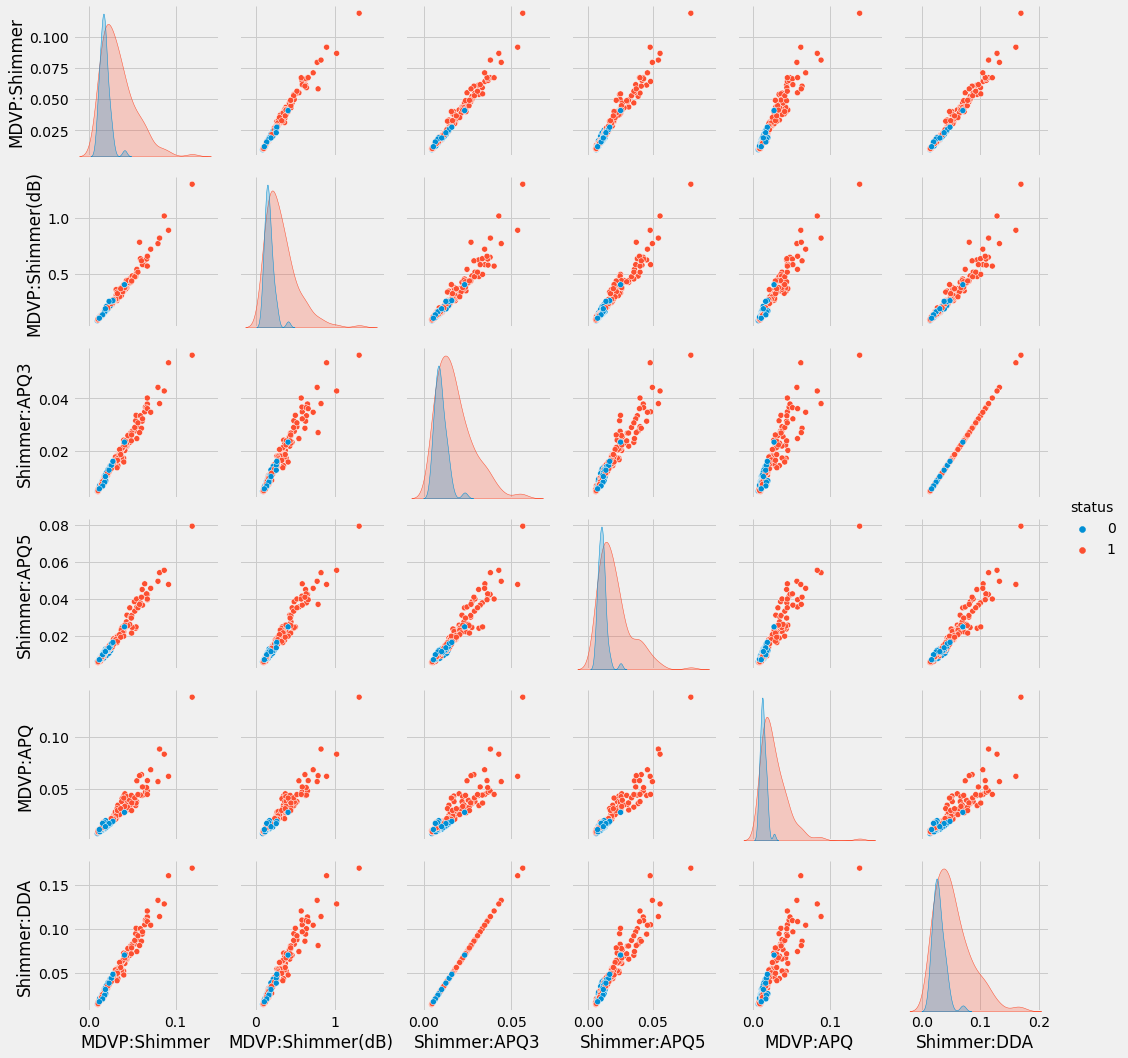

In [136]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(data,hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] )
plt.show()

From the above pair plot we can understand that all these measures variation in amplitude are highly correlated with eachother.

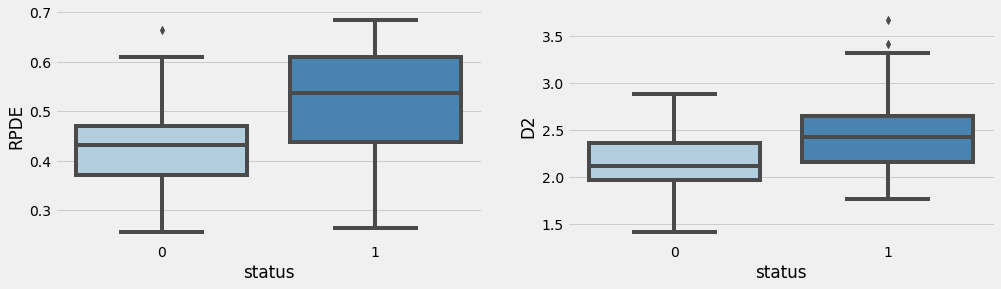

In [137]:
plt.rcParams['figure.figsize'] = (15,4)
plt.subplot(121)
sns.boxplot(data['status'], data['RPDE'], palette = 'Blues')

plt.subplot(122)
sns.boxplot(data['status'], data['D2'], palette = 'Blues')

plt.show()

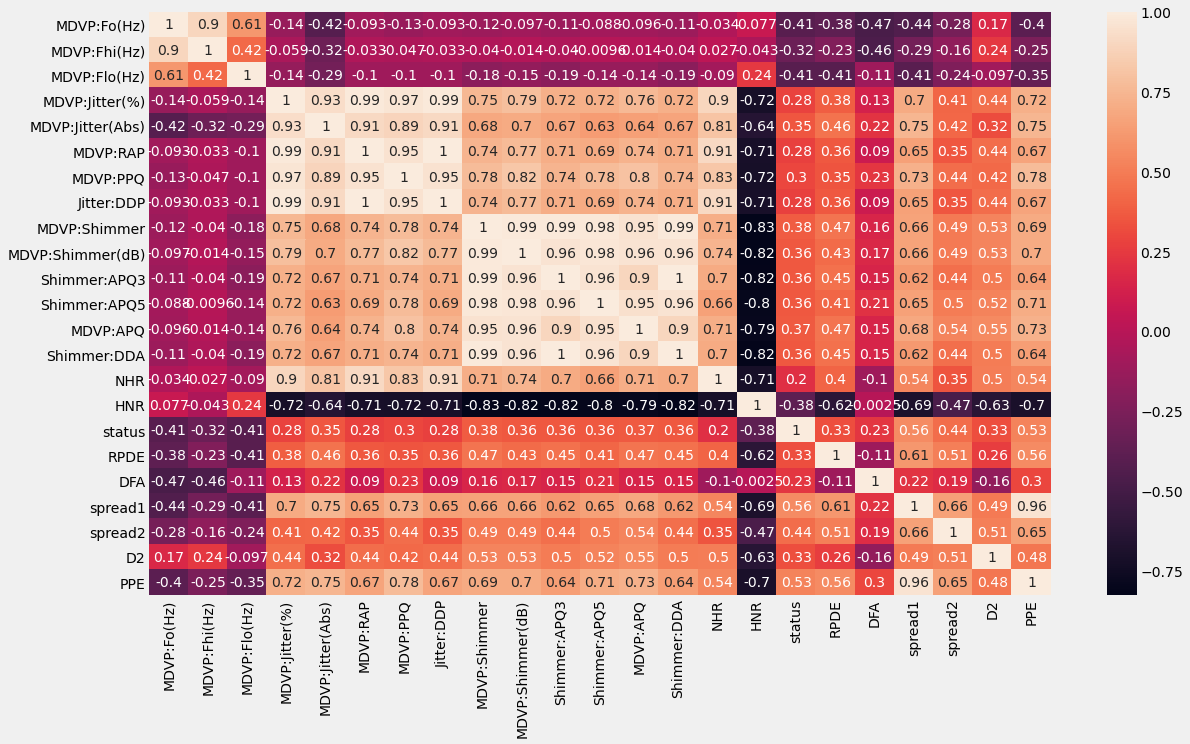

In [138]:
plt.rcParams['figure.figsize']=18,10

sns.heatmap(data.corr(), annot=True)

In [139]:
x=data.drop('status', axis=1)
y=data['status']

# Data splitting

In [140]:
#train and test data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [141]:
# Normalization of training and test data 
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.transform(X_test)

# Model building using KNN classifier algo (without class imbalancing treatment and dropping of highly correlated feature)

In [142]:
#let's find optimized n_neighbour value

error_rate = []
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean',p=2)
    knn.fit(X_train_scl,y_train)
    pred_i = knn.predict(X_test_scl)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

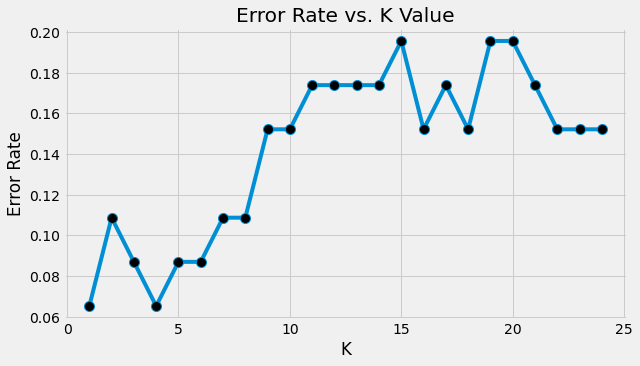

In [143]:
plt.figure(figsize=(9,5))
plt.plot(range(1,25),error_rate, marker='o',
         markerfacecolor='black', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### We can see that if the number of neighbors value increases more than 4, the error rate also increases. So we are choosing 4 as the n_neighbors value. Used P=2 as target class is binary and used euclian distance to measure the distance.

In [144]:
knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean',p=2)
knn.fit(X_train_scl,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [145]:
y_test_pred = knn.predict(X_test_scl)

# Accuracy matrics of KNN

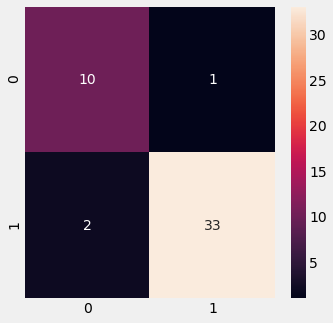

In [146]:
plt.rcParams['figure.figsize']=5,5
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True)

In [147]:
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test,y_test_pred))

0.9347826086956522
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.97      0.94      0.96        35

    accuracy                           0.93        46
   macro avg       0.90      0.93      0.91        46
weighted avg       0.94      0.93      0.94        46



## KNN after feature selection 
* In this correlation heatmap, we can see that many independent features are highly correlated with eachother. So, to omit multicolinearity let's work on features.
* Feature Selection using Boruta
* Boruta can be used on any tree based models
* it creates new shadow features for every orginal features.
* Shadow feature means randomly select some feature and shuffle it's values and creating new feature with it
* It will train and calculate the importance of the features.
* If orginal feature performed better than it's shadow feature, then it will mark it as important feature or else it will not

In [148]:
!pip install xgboost

In [149]:
!pip install boruta

In [150]:

from xgboost import XGBClassifier
from boruta import BorutaPy

model=XGBClassifier()

boruta = BorutaPy(estimator=model, n_estimators = 'auto',
                 max_iter = 100, random_state = 0)



In [151]:

# boruta.fit(np.array(x), np.array(y))
# best_features = x.columns[boruta.support_].to_list()
# print(best_features)


In [152]:
data_copy = data.copy()
data = data[['MDVP:Fo(Hz)', 'MDVP:Shimmer(dB)', 'HNR', 'spread1', 'PPE', 'status']]

In [153]:
x=data.drop('status', axis=1)
y=data['status']

# Data splitting

In [154]:
#train and test data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [155]:
# Normalization of training and test data 
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.transform(X_test)

# KNN Model building (after dropping of highly correlated feature to ease out the procesing)

In [156]:
#let's find optimized n_neighbour value

error_rate = []
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean',p=2)
    knn.fit(X_train_scl,y_train)
    pred_i = knn.predict(X_test_scl)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

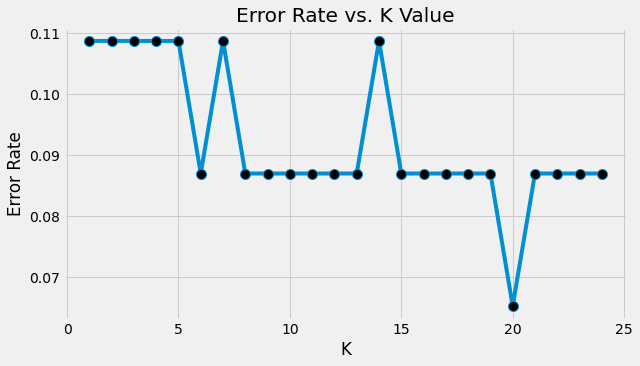

In [157]:
plt.figure(figsize=(9,5))
plt.plot(range(1,25),error_rate, marker='o',
         markerfacecolor='black', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### We can see that error is minimum at K=20. So we are choosing 20 as the n_neighbors value. Used P=2 as target class is binary and used euclian distance to measure the distance.

In [158]:
knn = KNeighborsClassifier(n_neighbors=20,metric='euclidean',p=2)
knn.fit(X_train_scl,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [159]:
y_test_pred = knn.predict(X_test_scl)

# Accuracy matrics of KNN

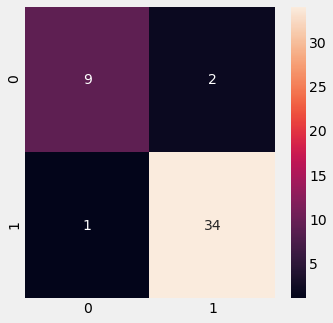

In [160]:
plt.rcParams['figure.figsize']=5,5
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True)

In [161]:
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test,y_test_pred))

0.9347826086956522
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.94      0.97      0.96        35

    accuracy                           0.93        46
   macro avg       0.92      0.89      0.91        46
weighted avg       0.93      0.93      0.93        46



## *it is evident from confusion matrix that accuracy not  compromised even after deletion of feature.*